// The Test Table
digraph {
	node [shape=box]
	A [label="Dot A"]
	B [label="Dot B"]
	C [label="Dot C" color=red]
	A -> B
	A -> C
	A -> B
	B -> C [label=test]
}
// The Test Table
digraph {
	node [shape=box]
	A [label="Dot A"]
	B [label="Dot B"]
	C [label="Dot C" color=red]
	A -> B
	A -> C
	A -> B
	B -> C [label=test]
}


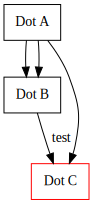

In [12]:
import  graphviz
dot =  graphviz.Digraph(comment='The Test Table')

dot.attr('node', shape='box')
# 添加圆点A,A的标签是Dot A
dot.node('A', 'Dot A')
# 添加圆点 B, B的标签是Dot B
dot.node('B', 'Dot B')
# 添加圆点 C, C的标签是Dot C
dot.node(name='C', label= 'Dot C',color='red')

# 创建一堆边，即连接AB的两条边，连接AC的一条边。
dot.edges(['AB', 'AC', 'AB'])
# dot.view()
# 在创建两圆点之间创建一条边
dot.edge('B', 'C', 'test')

# 获取DOT source源码的字符串形式
print(dot.source)
gvz=graphviz.Source(dot.source)

print (gvz.source)
display(gvz)


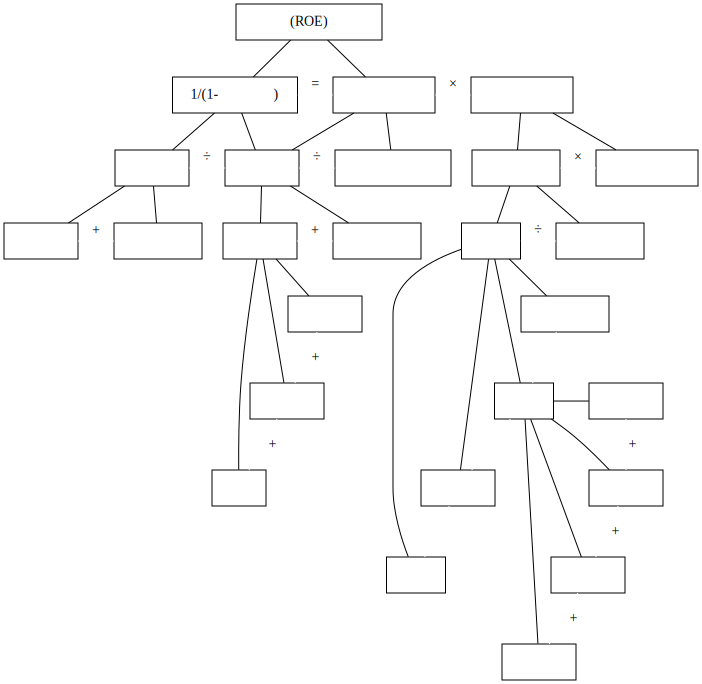

In [119]:
import  graphviz
dot =  graphviz.Graph(comment='杜邦分析法')
dot.attr('node', shape='box')
dot.node('A', '净资产收益率(ROE)')
with dot.subgraph() as c:
    c.attr(rank='same')
    c.node('B', '1/(1-资产负债率)')
    c.node('C', '平均权益乘数')
    c.node('D', '总资产收益率')

    
with dot.subgraph() as c:
    c.attr(rank='same')
    c.node('E', "负债总额")
    c.node('F', '资产总额')
    c.node('G', '所有者权益总额')
    c.node('H', '销售净利率')
    c.node('I', '总资产周转率')
        
with dot.subgraph() as c:
    c.attr(rank='same')
    c.node('J', "流动负债")
    c.node('K', '非流动负债')
    c.node('L', '流动资产')
    c.node('M', '非流动资产')
    c.node('N', '净利润') 
    c.node('O', '营业总收入') 

with dot.subgraph() as c:
    c.attr(rank='same')
    c.node('P', "货币资金")
    c.node('Q', "营业总收入")

with dot.subgraph() as c:
    c.attr(rank='same')
    c.node('R', "应收帐款")
    c.node('S', "总成本")    
    c.node('T', "营业成本")       
    
with dot.subgraph() as c:
    c.attr(rank='same')
    c.node('U', "存货")
    c.node('V', "其他利润")    
    c.node('W', "销售费用")         
    
with dot.subgraph() as c:
    c.attr(rank='same')
    c.node('X', "所得税")
    c.node('Y', "管理费用")    

with dot.subgraph() as c:
    c.attr(rank='same')
    c.node('Z', "财务费用")
    
    
dot.edges(['AB','AC','BE','BF','CF','CG','DH','DI','EJ','EK','FL','FM','HN','HO','LP','NQ','LR','NS','ST','SW','SY','SZ','LU','NV','NX'])
dot.edge('B', 'C',label='=', color='white')
dot.edge('C', 'D',label='×', color='white')
dot.edge('P', 'R',label='+', color='white')
dot.edge('R', 'U',label='+', color='white')

dot.edge('T', 'W',label='+', color='white')
dot.edge('W', 'Y',label='+', color='white')
dot.edge('Y', 'Z',label='+', color='white')
dot.edge('L', 'M',label='+', color='white')
dot.edge('N', 'O',label='÷', color='white') 
dot.edge('J', 'K',label='+', color='white') 
dot.edge('E', 'F',label='÷', color='white') 
dot.edge('F', 'G',label='÷', color='white') 
dot.edge('H', 'I',label='×', color='white') 

dot.edge('Q', 'S',label='', color='white') 
dot.edge('S', 'V',label='', color='white') 
dot.edge('V', 'X',label='', color='white') 

gvz=graphviz.Source(dot.source)
display(gvz)


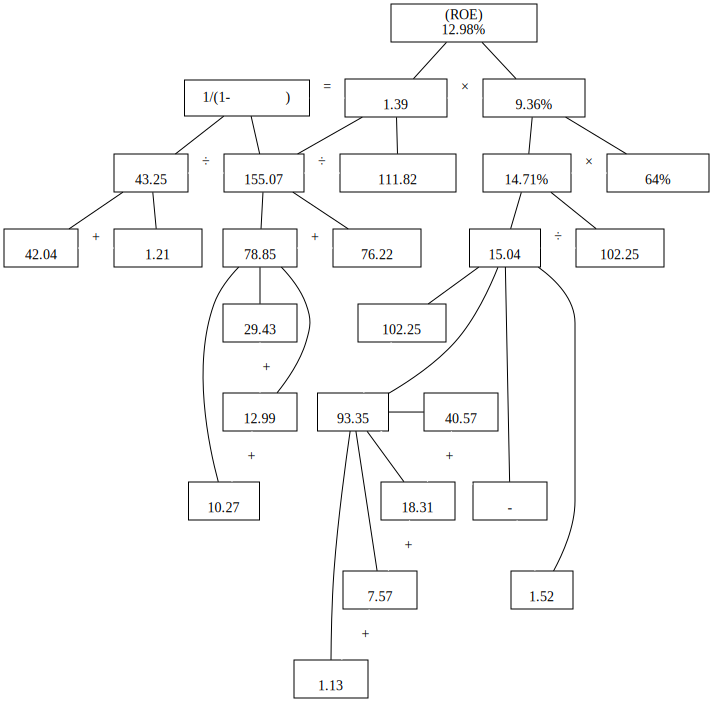

,money_cap,accounts_receiv,inventories,total_cur_assets,total_nca,total_assets,total_cur_liab,total_ncl,total_liab,total_hldr_eqy_inc_min_int
0,2.943192e+09,1.299283e+09,1.027189e+09,7.884617e+09,7.622313e+09,1.550693e+10,4.203705e+09,1.208335e+08,4.324538e+09,1.118239e+10


In [151]:
import tushare as ts
import pandas as pd
from datetime import datetime 
pro = ts.pro_api()
def dupont(ts_code,year='2020'):
    df = pro.balancesheet(ts_code='002624.sz',fields='total_cur_assets,total_hldr_eqy_inc_min_int,total_ncl,total_liab,total_cur_liab,total_assets,money_cap,total_nca,accounts_receiv,inventories',period=str(year)+'1231')[:1]
    df_income=pro.income(ts_code='002624.sz',fields='income_tax,total_cogs,n_income,total_revenue,admin_exp,oper_cost,sell_exp,fin_exp',period=str(year)+'1231')[:1]
    df_ind=pro.fina_indicator(ts_code='002624.sz',fields='assets_turn',period=str(year)+'1231')[:1]
    
    
    assets_turn=str(round(df_ind['assets_turn'].values[0],2))
    total_cur_assets=str(round(df['total_cur_assets'].values[0]/100000000,2))+"亿"
    inventories=str(round(df['inventories'].values[0]/100000000,2))+"亿"
    money_cap=str(round(df['money_cap'].values[0]/100000000,2))+"亿"
    accounts_receiv=str(round(df['accounts_receiv'].values[0]/100000000,2))+"亿"
    total_nca=str(round(df['total_nca'].values[0]/100000000,2))+"亿"
    total_assets=str(round(df['total_assets'].values[0]/100000000,2))+"亿"
    total_cur_liab=str(round(df['total_cur_liab'].values[0]/100000000,2))+"亿"
    total_liab=str(round(df['total_liab'].values[0]/100000000,2))+"亿"
    total_ncl=str(round(df['total_ncl'].values[0]/100000000,2))+"亿"
    total_hldr_eqy_inc_min_int=str(round(df['total_hldr_eqy_inc_min_int'].values[0]/100000000,2))+"亿"
    
    total_cogs=str(round(df_income['total_cogs'].values[0]/100000000,2))+"亿"
    oper_cost=str(round(df_income['oper_cost'].values[0]/100000000,2))+"亿"
    sell_exp=str(round(df_income['sell_exp'].values[0]/100000000,2))+"亿"
    admin_exp=str(round(df_income['admin_exp'].values[0]/100000000,2))+"亿"
    fin_exp=str(round(df_income['fin_exp'].values[0]/100000000,2))+"亿"
    total_revenue=str(round(df_income['total_revenue'].values[0]/100000000,2))+"亿"
    n_income=str(round(df_income['n_income'].values[0]/100000000,2))+"亿"
    income_tax=str(round(df_income['income_tax'].values[0]/100000000,2))+"亿"
    
    
    import  graphviz
    dot =  graphviz.Graph(comment='杜邦分析法-002624')
    dot.attr('node', shape='box')
    dot.node('A', "净资产收益率(ROE)\n"+str(round(df['total_assets'].values[0]/df['total_hldr_eqy_inc_min_int'].values[0]*df_income['n_income'].values[0]/df_income['total_revenue'].values[0]*df_ind['assets_turn'].values[0]*100,2))+"%")
    with dot.subgraph() as c:
        c.attr(rank='same')
        c.node('B', '1/(1-资产负债率)')
        c.node('C', "平均权益乘数\n"+str(round(df['total_assets'].values[0]/df['total_hldr_eqy_inc_min_int'].values[0],2)))
        c.node('D', "总资产收益率\n"+str(round(df_income['n_income'].values[0]/df_income['total_revenue'].values[0]*df_ind['assets_turn'].values[0]*100,2))+"%")


    with dot.subgraph() as c:
        c.attr(rank='same')
        c.node('E', "负债总额\n"+total_liab)
        c.node('F', "资产总额\n"+total_assets)
        c.node('G', "所有者权益总额\n"+total_hldr_eqy_inc_min_int)
        c.node('H', "销售净利率\n"+str(round(df_income['n_income'].values[0]/df_income['total_revenue'].values[0]*100,2))+"%")
        c.node('I', "总资产周转率\n"+str(int(float(assets_turn)*100))+"%")

    with dot.subgraph() as c:
        c.attr(rank='same')
        c.node('J', "流动负债\n"+total_cur_liab)
        c.node('K', "非流动负债\n"+total_ncl)
        c.node('L', '流动资产'+"\n"+total_cur_assets)
        c.node('M', "非流动资产\n"+total_nca)
        c.node('N', "净利润\n"+n_income) 
        c.node('O', "营业总收入\n"+total_revenue) 

    with dot.subgraph() as c:
        c.attr(rank='same')
        c.node('P', "货币资金\n"+money_cap)
        c.node('Q', "营业总收入\n"+total_revenue)

    with dot.subgraph() as c:
        c.attr(rank='same')
        c.node('R', "应收帐款\n"+accounts_receiv)
        c.node('S', "总成本\n"+total_cogs)    
        c.node('T', "营业成本\n"+oper_cost)       

    with dot.subgraph() as c:
        c.attr(rank='same')
        c.node('U', "存货\n"+inventories)
        c.node('V', "其他利润\n-")    
        c.node('W', "销售费用\n"+sell_exp)         

    with dot.subgraph() as c:
        c.attr(rank='same')
        c.node('X', "所得税\n"+income_tax)
        c.node('Y', "管理费用\n"+admin_exp)    

    with dot.subgraph() as c:
        c.attr(rank='same')
        c.node('Z', "财务费用\n"+fin_exp)


    dot.edges(['AD','AC','BE','BF','CF','CG','DH','DI','EJ','EK','FL','FM','HN','HO','LP','NQ','LR','NS','ST','SW','SY','SZ','LU','NV','NX'])
    dot.edge('B', 'C',label='=', color='white')
    dot.edge('C', 'D',label='×', color='white')
    dot.edge('P', 'R',label='+', color='white')
    dot.edge('R', 'U',label='+', color='white')

    dot.edge('T', 'W',label='+', color='white')
    dot.edge('W', 'Y',label='+', color='white')
    dot.edge('Y', 'Z',label='+', color='white')
    dot.edge('L', 'M',label='+', color='white')
    dot.edge('N', 'O',label='÷', color='white') 
    dot.edge('J', 'K',label='+', color='white') 
    dot.edge('E', 'F',label='÷', color='white') 
    dot.edge('F', 'G',label='÷', color='white') 
    dot.edge('H', 'I',label='×', color='white') 

    dot.edge('Q', 'S',label='', color='white') 
    dot.edge('S', 'V',label='', color='white') 
    dot.edge('V', 'X',label='', color='white') 

    gvz=graphviz.Source(dot.source)
    display(gvz)
    
    
    
    
    return df

df=dupont('002624.sz')
df

In [5]:
print(len(df.columns.to_list()))

361
